In [72]:
# imports
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import re

In [73]:
# Function to process a single log file
def process_log(file_path):
    """ 
    Process a single log file and return a DataFrame.
    The log file is expected to contain lines with the following format:
    2023-10-01T12:00:00.000 GPU 0 0.0 0.0 0.0 50 100.0
    where:
    - Timestamp: 2023-10-01T12:00:00.000
    - GPU: GPU 0
    - GRACT: 0.0
    - SMACT: 0.0
    - TENSO: 0.0
    - TMPTR: 50
    - POWER: 100.0
    The function will ignore lines that start with "#" or are empty.
    It will also ignore lines that do not match the expected format.
    """
    data = []
    with open(file_path, 'r') as file:
        for line in file:
            # Ignore metadata lines
            if line.startswith("#") or line.strip() == "":
                continue
            # Match GPU data lines
            match = re.match(r'(\d{4}-\d{2}-\d{2}T\d{2}:\d{2}:\d{2}\.\d{3})\s+(GPU \d+)\s+([\d.N/A]+)\s+([\d.N/A]+)\s+([\d.N/A]+)\s+(\d+|N/A)\s+([\d.N/A]+)', line)
            if match:
                timestamp, gpu, gract, smact, tenso, tmptr, power = match.groups()
                data.append({
                    "Timestamp": timestamp,
                    "GPU": gpu,
                    "GRACT": float(gract) if gract != 'N/A' else None,
                    "SMACT": float(smact) if smact != 'N/A' else None,
                    "TENSO": float(tenso) if tenso != 'N/A' else None,
                    "TMPTR": int(tmptr) if tmptr != 'N/A' else None,
                    "POWER": float(power) if power != 'N/A' else None,
                })
    
    # create a DataFrame
    df = pd.DataFrame(data)
    # Convert Timestamp to datetime
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])
    # Round timestamp down to 0.1 seconds
    df['Timestamp'] = df['Timestamp'].dt.floor('100ms')
    # Set the index to the timestamp
    df.set_index('Timestamp', inplace=True)

    # Create DataFrame
    return df


def create_df_dict(log_folder):
    """ 
    Create a dictionary with a dataframe for each node.
    The log files are expected to be in the format nid00XXXX.log, where XXXX is the node number.
    The function will process each log file and store the resulting dataframe in a dictionary.
    The keys of the dictionary will be the node numbers (last 4 digits of the file name before the .log).
    The values will be the dataframes.
    """
    # create a dictionary with a dataframe for each node
    log_dict = {}

    min_time = None
    min_node = None
    max_time = None
    max_node = None
    # loop over all files in the folder
    for file_name in os.listdir(log_folder):
        if file_name.endswith(".log"):
            # create the full path to the file
            file_path = os.path.join(log_folder, file_name)
            # get the number of the node (last 4 digits of the file name before the .log)
            node_number = file_name.split(".")[0][-4:]
            # process the log file and store the dataframe in the dictionary
            log_dict[node_number] = process_log(file_path)

            # # analyze the timestamps for different nodes
            # if min_time is None or log_dict[node_number]['Timestamp'].min() < min_time:
            #     min_time = log_dict[node_number]['Timestamp'].min()
            #     min_node = node_number
            # if max_time is None or log_dict[node_number]['Timestamp'].max() > max_time:
            #     max_time = log_dict[node_number]['Timestamp'].max()
            #     max_node = node_number
            
    
    # print(f"Minimum time: {min_time} from node {min_node}")
    # print(f"Maximum time: {max_time} from node {max_node}")

    return log_dict, min_time, max_time


# Example usage for single log
file_path = "../straggler_log/347469/nid007026.log"
df = process_log(file_path)
# get an idea of the dataframe
display(df.head(10))
#print(df[30:90])
#print(df.describe())
print(df.columns)


# get the path to the folder with all log files
log_folder = "../straggler_log/347469/"
# create a dictionary with a dataframe for each node
log_dict, min_time, max_time = create_df_dict(log_folder)
print(log_dict.keys())



,GPU,GRACT,SMACT,TENSO,TMPTR,POWER
Timestamp,,,,,,
2025-04-16 18:08:54.800,GPU 3,0.999,0.241,0.097,35,247.503
2025-04-16 18:08:54.800,GPU 2,0.999,0.242,0.098,35,253.942
2025-04-16 18:08:54.800,GPU 1,0.999,0.242,0.097,35,253.494
2025-04-16 18:08:54.800,GPU 0,0.999,0.148,0.097,30,255.208
2025-04-16 18:08:54.900,GPU 3,0.999,0.356,0.188,35,236.867
2025-04-16 18:08:54.900,GPU 2,0.999,0.352,0.184,35,235.419
2025-04-16 18:08:54.900,GPU 1,0.999,0.355,0.188,35,248.169
2025-04-16 18:08:54.900,GPU 0,0.999,0.281,0.212,35,236.874
2025-04-16 18:08:55.000,GPU 3,0.998,0.533,0.368,38,228.517


Index(['GPU', 'GRACT', 'SMACT', 'TENSO', 'TMPTR', 'POWER'], dtype='object')
dict_keys(['7044', '7520', '7246', '7252', '7534', '7508', '7285', '7291', '7454', '7332', '7326', '7440', '7468', '7497', '7483', '7656', '7642', '7643', '7657', '7482', '7496', '7469', '7327', '7441', '7455', '7333', '7290', '7284', '7253', '7535', '7521', '7247', '7045', '7537', '7251', '7245', '7523', '7279', '7292', '7286', '7443', '7325', '7331', '7457', '7319', '7480', '7494', '7641', '7655', '7669', '7668', '7654', '7640', '7495', '7481', '7318', '7330', '7456', '7442', '7324', '7287', '7293', '7278', '7244', '7522', '7536', '7250', '7042', '7268', '7254', '7526', '7240', '7297', '7283', '7308', '7320', '7446', '7452', '7334', '7485', '7491', '7644', '7650', '7651', '7645', '7490', '7484', '7453', '7335', '7321', '7447', '7309', '7282', '7296', '7527', '7241', '7533', '7269', '7519', '7243', '7525', '7531', '7257', '7280', '7294', '7479', '7337', '7451', '7445', '7323', '7492', '7486', '7647', '7646', '

In [74]:
# # separate the dataframes by GPU and compute the timestamp difference
# gpu0_df = df[df['GPU'] == 'GPU 0']
# gpu1_df = df[df['GPU'] == 'GPU 1']
# gpu2_df = df[df['GPU'] == 'GPU 2']
# gpu3_df = df[df['GPU'] == 'GPU 3']

# # compute the timestamp difference
# gpu0_df['Timestamp'] = pd.to_datetime(gpu0_df['Timestamp'])
# gpu1_df['Timestamp'] = pd.to_datetime(gpu1_df['Timestamp'])
# gpu2_df['Timestamp'] = pd.to_datetime(gpu2_df['Timestamp'])
# gpu3_df['Timestamp'] = pd.to_datetime(gpu3_df['Timestamp'])
# gpu0_df['Timestamp_diff'] = gpu0_df['Timestamp'].diff().dt.total_seconds()
# gpu1_df['Timestamp_diff'] = gpu1_df['Timestamp'].diff().dt.total_seconds()
# gpu2_df['Timestamp_diff'] = gpu2_df['Timestamp'].diff().dt.total_seconds()
# gpu3_df['Timestamp_diff'] = gpu3_df['Timestamp'].diff().dt.total_seconds()
# # plot in a histogram
# plt.figure(figsize=(10, 6))
# plt.hist(gpu0_df['Timestamp_diff'], bins=100, alpha=0.5, label='GPU 0')
# plt.hist(gpu1_df['Timestamp_diff'], bins=100, alpha=0.5, label='GPU 1')
# plt.hist(gpu2_df['Timestamp_diff'], bins=100, alpha=0.5, label='GPU 2')
# plt.hist(gpu3_df['Timestamp_diff'], bins=100, alpha=0.5, label='GPU 3')
# plt.xlabel('Timestamp difference (s)')
# plt.ylabel('Frequency')
# plt.title('Timestamp difference for each GPU')
# plt.legend()
# plt.show()

/var/folders/hk/p8g5d53x4gjbqpkr0vbzb9680000gn/T/ipykernel_28564/1562676882.py:49: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['Average'] = df.mean(axis=1)
/var/folders/hk/p8g5d53x4gjbqpkr0vbzb9680000gn/T/ipykernel_28564/1562676882.py:50: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['std'] = df.std(axis=1)
/var/folders/hk/p8g5d53x4gjbqpkr0vbzb9680000gn/T/ipykernel_28564/1562676882.py:62: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor p

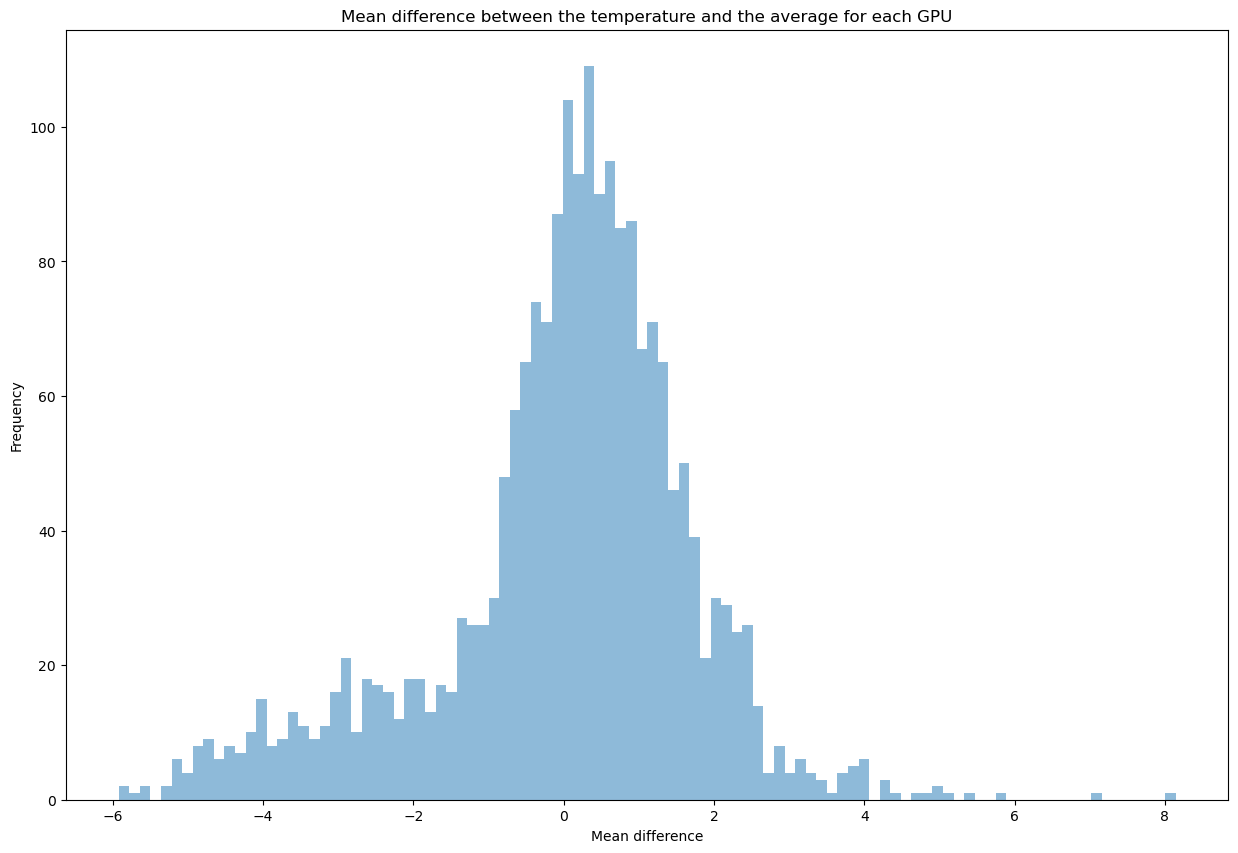

Max mean difference: 8.142658145473394 for column 7601-GPU 1_diff


In [75]:

def metric_dataframe_generation(log_dict, metric):
    """ 
    Generate a dataframe for a specific metric from the log dictionary.
    The function will create a dataframe with the Timestamp as the index and the node-GPUs as columns.
    """
    # Create a list to hold processed dataframes
    processed_dfs = []

    for node, df in log_dict.items():
        # Filter only the metric we want along with the GPU and Timestamp
        df = df[[metric, "GPU"]].copy()
        
        # Add a node prefix to the GPU column for uniqueness
        df["GPU"] = df["GPU"].apply(lambda x: f"{node}-{x}")

        # Pivot the dataframe to make GPUs columns, using the Timestamp as the index
        pivoted_df = df.pivot_table(index=df.index, columns="GPU", values=metric)
        
        # Add the processed dataframe to the list
        processed_dfs.append(pivoted_df)

    # Combine all pivoted dataframes on the Timestamp index
    metric_df = pd.concat(processed_dfs, axis=1)

    return metric_df


def plot_columns(df, columns=None):
    """
    Plot all columns of the dataframe.
    """
    plt.figure(figsize=(15, 10))
    if columns is None:
        columns = df.columns
    for column in columns:
        plt.plot(df.index, df[column], label=column)
    plt.legend()
    plt.xlabel('Timestamp')
    plt.ylabel('Value')
    plt.title('All columns over time')
    plt.show()

def add_distibution_info(df):
    """
    Add an average column to the dataframe, do not consider the NaN values.
    The average is calculated over all columns for each row.
    """
    # Add a column with the average and std
    df['Average'] = df.mean(axis=1)
    df['std'] = df.std(axis=1)

    return df

def diff_dataframe(df):
    """
    Add for every column, a column with the difference between the temperature and the average.
    """
    # Add a column with the difference between the temperature and the average
    diff_df = df[['Average', 'std']].copy()
    for column in df.columns:
        if column != 'Average' and column != 'std':
            diff_df[f'{column}_diff'] = df[column] - df['Average']
    
    return diff_df

def diff_histogram(df):
    """
    Plot the mean difference between the temperature and the average for each GPU.
    """
    # Create a scatter plot for the mean difference between the temperature and the average
    plt.figure(figsize=(15, 10))
    mean_diff = {}
    for column in df.columns:
        if column != 'Average' and column != 'std':
            mean_diff[column] = df[column].mean()

    # do a histogram for the mean difference
    plt.hist(mean_diff.values(), bins=100, alpha=0.5)
    plt.xlabel('Mean difference')
    plt.ylabel('Frequency')
    plt.title('Mean difference between the temperature and the average for each GPU')
    plt.show()

    # get the column with the max mean difference
    max_mean_diff = max(mean_diff.values())
    max_mean_diff_column = [k for k, v in mean_diff.items() if v == max_mean_diff][0]
    print(f"Max mean difference: {max_mean_diff} for column {max_mean_diff_column}")



# Access specific DataFrame for a metric (example for GRACT)
temp_dataframe = metric_dataframe_generation(log_dict, 'TMPTR')
#display(temp_dataframe.head(10))

temp_df = add_distibution_info(temp_dataframe)
#plot_columns(temp_df, columns=['Average', 'std'])
# Add the difference columns
diff_df = diff_dataframe(temp_df)
#display(diff_df.head(10))
# Plot the difference scatter plot
diff_histogram(diff_df)


# Plot all columns to see the mess
#plot_all_columns(temp_dataframe)

# # Add a column at the end with the amount of NaN values
# temp_dataframe['NaN_count'] = temp_dataframe.isna().sum(axis=1)
# # plot the amount of NaN values
# plt.figure(figsize=(15, 10))
# plt.plot(temp_dataframe.index, temp_dataframe['NaN_count'], label='NaN count')
# plt.xlabel('Timestamp')
# plt.ylabel('NaN count')
# plt.title('NaN count over time')
# plt.legend()
# plt.show()
# # print the min of the NaN count
# print(temp_dataframe['NaN_count'].min())
# # print the columns which have a NaN in the row with the min NaN count
# min_nan_df = temp_dataframe[temp_dataframe['NaN_count'] == temp_dataframe['NaN_count'].min()]
# print(min_nan_df.columns[min_nan_df.isna().any()].tolist())


ValueError: cannot reindex on an axis with duplicate labels

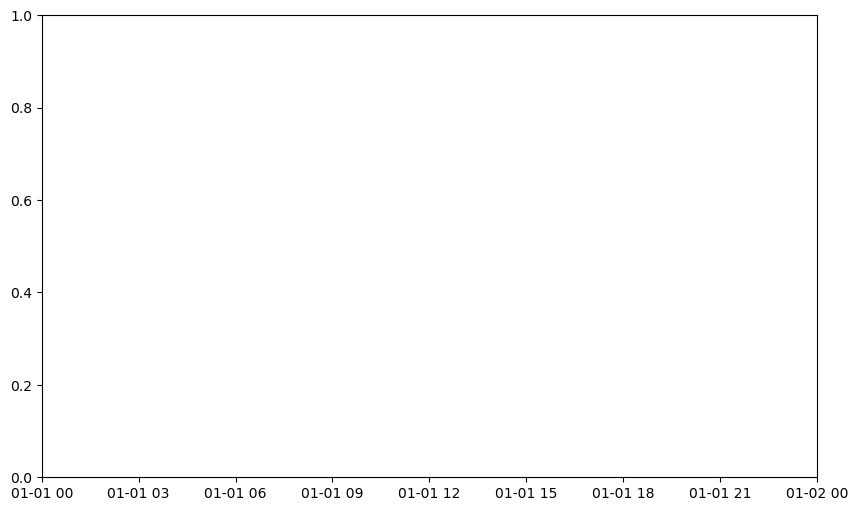

In [76]:
def plot_dcgm_data(df):
    """ 
    Plot the DCGM data for a given DataFrame, one plot per measured metric.
    """

    for col in df.columns[2:]:
        plt.figure(figsize=(10, 6))
        sns.lineplot(data=df, x='Timestamp', y=col)
        plt.title(f"{col} over Time")
        # Format the x-axis to show fewer ticks and rotate them for better readability
        ax = plt.gca()
        ax.xaxis.set_major_locator(mdates.AutoDateLocator())
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))
        ax.tick_params(axis='x', rotation=45)
        plt.xlabel("Timestamp")
        plt.ylabel(col)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

def plot_multiple_nodes(log_dict, node_list=None):
    """
    Plot the DCGM data for multiple nodes on the same plot with different colors.
    """
    if node_list is None:
        # plot all nodes
        node_list = log_dict.keys()

    for col in log_dict[node_list[0]].columns[2:]:
        plt.figure(figsize=(10, 6))
        for node in node_list:
            df = log_dict[node]
            sns.lineplot(data=df, x='Timestamp', y=col, label=node)
        plt.title(f"{col} over Time for Nodes: {', '.join(node_list)}")
        # Format the x-axis to show fewer ticks and rotate them for better readability
        ax = plt.gca()
        ax.xaxis.set_major_locator(mdates.AutoDateLocator())
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))
        ax.tick_params(axis='x', rotation=45)
        plt.xlabel("Timestamp")
        plt.ylabel(col)
        plt.xticks(rotation=45)
        plt.legend()
        plt.tight_layout()
        plt.show()


#plot_dcgm_data(df)
plot_multiple_nodes(log_dict, node_list=['7026', '7027', '7028', '7029', '7030', '7031', '7200', '7201', '7203', '7204', '7601'])